In [90]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path
from sklearn.cluster import MiniBatchKMeans as Kmeans

# 1. Read excel file

In [2]:
filename='SCMission 2023_Round 3_raw_Data.xlsx'
Customer_Master = pd.read_excel(filename, sheet_name= 1)
Data_Master = pd.read_excel(filename, sheet_name=0)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
Product_Master= Data_Master.iloc[0:37, 0:17]
Product_Master= Product_Master.rename(columns=Product_Master.iloc[0])
Product_Master = Product_Master[1:]
Product_Master

,ProductID,ProductName,Category,SubCategory,BaseUnit,ShelfLifeInDays,KgPerCarton,KgPerLiter,StorageCondition,TempCondition,m^3PerCarton,KgPerPallet,CartonsPerPallet,Unit,UnitperCarton,Type
1,3110922,AW MLK WHOLE CN 9X1L BOT EXP,Consumer Dairy Liquid,Fresh White Milk,CAR,21,9.297,1.033,Chilled,+2 Degrees,0.013,929.7,100,GBOT,9,1L
2,3113090,NAC AE WHIPD CRM 12X400G CTN,Consumer Dairy Liquid,Fresh Cream,CAR,365,4.8,1,Chilled,+2 Degrees,0.015,403.2,84,CTN,12,400G
3,3112144,NAC AE WHIPD CRM 9X400G CTN,Consumer Dairy Liquid,Fresh Cream,CAR,365,3.6,1,Chilled,+2 Degrees,0.012,345.6,96,CTN,9,400G
4,116052,NAC UHT CRM CUL CRM AU 12X1L CTN,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.144,1.012,Chilled,+2 Degrees,0.015,910.8,75,CTN,12,1L
5,115532,NAC UHT CRM EX YD AU 12X1L,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.348,1.029,Chilled,+2 Degrees,0.015,926.1,75,CTN,12,1L
6,121412,NAC UHT CRM EX YD AU 12X1L HCAP,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.288,1.024,Chilled,+4 Degrees,0.016,921.6,75,CTN,12,1L
7,121442,NAC UHT CRM WHIPG 12X1L HCAP,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12,1,Chilled,+4 Degrees,0.016,900,75,CTN,12,1L
8,115906,NAC UHT CRM WHIPG AU 12X1L,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.12,1.01,Chilled,+2 Degrees,0.015,909.0,75,CTN,12,1L
9,121380,NAC UHT CUL CRM AU 12X1L HCAP,Consumer Dairy Liquid UHT,UHT Cream,CAR,270,12.096,1.008,Chilled,+4 Degrees,0.016,907.2,75,CTN,12,1L
10,121441,NAC UHT MLK BISTA 12X1L HCAP,Consumer Dairy Liquid UHT,UHT White Milk,CAR,270,12.408,1.034,Chilled,Ambient,0.016,1054.68,85.0,CTN,12,1L


In [4]:
Packaging_Master = Data_Master.iloc[39:50, 0:5]
Packaging_Master = Packaging_Master.rename(columns=Packaging_Master.iloc[0])
Packaging_Master = Packaging_Master.ffill()
Packaging_Master= Packaging_Master[1:]
Packaging_Master

,Type,NaN,Weight (grams),GHG emissions factor (CO₂-eq/kg),NaN
40,Type,NaN,Weight (grams),Recycled content,Virgin content
41,Carton,400G,40,0.57,0.7
42,Carton,15ML,5,0.57,0.7
43,Carton,250ML,25,0.57,0.7
44,Carton,1L,50,0.57,0.7
45,Plastic Bottle,300ML,15,1.7,3.1
46,Plastic Bottle,600ML,25,1.7,3.1
47,Glass Bottle,1L,500,0.55,1.2
48,Glass Bottle,2L,1000,0.55,1.2
49,Glass Bottle,3L,1500,0.55,1.2


In [5]:
Facility_Master = Data_Master.iloc[52:73, 0:11]
Facility_Master = Facility_Master.rename(columns=Facility_Master.iloc[0])
Facility_Master = Facility_Master[1:]
Facility_Master

,FacilityRef,FacilityName,Type,Address,Street,Suburb,Postcode,StorageCapacityInPallet,Longitude,Latitude,City
53,A003,Facility 13,Plant,"155, Mersey Main Rd, Spreyton, TAS, 7310","155, Mersey Main Rd",Spreyton,7310,15360,146.360487,-41.218794,Devonport
54,A003,Facility 3,Plant,"155, Mersey Main Rd, Spreyton, TAS, 7310","155, Mersey Main Rd",Spreyton,7310,15360,146.35423,-41.224665,Latrobe
55,A004,Facility 12,Plant,"86/92 Inglis Street, Wynyard, TAS, 7325",86/92 Inglis Street,Wynyard,7325,4800,145.709869,-40.989144,Waratah/Wynyard
56,A049,Facility 16,Plant,"58-64 Glenbarry Road, Campbellfield, VIC, 3061",58-64 Glenbarry Road,Campbellfield,3061,1200,144.956494,-37.662794,Hume
57,A044,Facility 9,Plant,"129 Curdie Street, Cobden, Vic, 3266",129 Curdie Street,Cobden,3266,1200,143.064535,-38.3274,Corangamite
58,A009,Facility 10,Plant,"20 Midland Hwy, Stanhope, VIC, 3623",20 Midland Hwy,Stanhope,3623,600,144.982562,-36.448018,Campaspe
59,A045,Facility 11,Plant,"Darnum Park Rd, Darnum, VIC, 3822",Darnum Park Rd,Darnum,3822,600,146.006907,-38.173245,Baw Baw
60,A045,Facility 2,Plant,"Darnum Park Rd, Darnum, VIC, 3822",Darnum Park Rd,Darnum,3822,600,146.006644,-38.173387,Baw Baw
61,A044,Facility 9,Plant,"129 Curdie Street, Cobden, Vic, 3266",129 Curdie Street,Cobden,3266,600,143.064488,-38.327407,Corangamite
62,A048,Facility 15,Plant,"4 Tramac Drive, Tullamarine, VIC, 3043",4 Tramac Drive,Tullamarine,3043,480,144.870801,-37.692919,Hume


In [6]:
Collection_Point_Capacity = Data_Master.iloc[82:86, 0:6]
Collection_Point_Capacity = Collection_Point_Capacity.rename(columns=Collection_Point_Capacity.iloc[0])
Collection_Point_Capacity = Collection_Point_Capacity[1:]
Collection_Point_Capacity = Collection_Point_Capacity.ffill()
Collection_Point_Capacity

,Size,Number of Pallet,Annual Pallet Cost ($),Overflow Cost ($/pallet/day),Energy Consumption (kWh/pallet/year),CO2 emissions (kgCO2e/kWh)
83,Small,70,7000,3,2.4,0.371
84,Medium,230,23000,3,2.4,0.371
85,Big,1100,110000,3,2.4,0.371


In [8]:
Sales_Order = pd.read_excel(filename, sheet_name= 'Sales_Order')
# Filter rows in year 2022
Sales_Order_2022 = Sales_Order.loc[(Sales_Order['SOCreationDate'].dt.year == 2022)]
Sales_Order_2022.dropna(axis=0, inplace=True)
Sales_Order_2022 = Sales_Order_2022.dropna(axis = 0)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6684\273206407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales_Order_2022.dropna(axis=0, inplace=True)


In [9]:
Sales_Order_2022

,SOCreationDate,OrderNumber,OriginRef,ProductID,CustomerRef,DeliveryDate,GoodsIssueDate,RequestedDelivDate,Channel,SalesOrganization,OrderQuantityInKg,DispatchQuantityInKg,GrossWeightInKg,NetWeightInKg
0,2022-12-31,5783479,A044,3110656,11002626,2022-12-31,2022-12-31,2022-12-31,GR,Organization 1,9529.344,9529.344,9774.336,9529.344
1,2022-12-31,5783479,A044,3110687,11002626,2022-12-31,2022-12-31,2022-12-31,GR,Organization 1,11911.680,11911.680,12243.840,11911.680
2,2022-12-31,5783479,A044,3110685,11002626,2022-12-31,2022-12-31,2022-12-31,GR,Organization 1,15470.208,15470.208,15868.320,15470.208
3,2022-12-31,5783479,A044,3110678,11002626,2022-12-31,2022-12-31,2022-12-31,GR,Organization 1,33320.448,33320.448,34250.496,33320.448
4,2022-12-31,5783497,A044,3110656,11002626,2023-01-01,2023-01-01,2023-01-01,GR,Organization 1,8338.176,8338.176,8552.544,8338.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261511,2022-01-01,5406572,A093,112415,11000300,2022-01-11,2022-01-07,2022-01-11,FS,Organization 1,48.000,48.000,54.600,48.000
261512,2022-01-01,5406572,A093,106149,11000300,2022-01-11,2022-01-07,2022-01-11,FS,Organization 1,57.600,57.600,62.784,57.600
261513,2022-01-01,5406572,A093,3002069,11000300,2022-01-11,2022-01-07,2022-01-11,FS,Organization 1,72.000,72.000,76.080,72.000
261514,2022-01-01,5406572,A093,3002079,11000300,2022-01-11,2022-01-07,2022-01-11,FS,Organization 1,120.000,120.000,128.640,120.000


In [284]:
Product_Master['ProductID'] = Product_Master['ProductID'].astype('int64')
Package_Per_Sales_Order = pd.merge(Sales_Order_2022[['GoodsIssueDate','ProductID', "CustomerRef", 'GrossWeightInKg','NetWeightInKg']],
                                   Product_Master[['ProductID', 'KgPerPallet', 'Unit']],on='ProductID',how='inner')
Package_Per_Sales_Order['Pallets']=(Package_Per_Sales_Order['NetWeightInKg']/Package_Per_Sales_Order['KgPerPallet']).astype(float).round(2)
Package_Per_Sales_Order

,GoodsIssueDate,ProductID,CustomerRef,GrossWeightInKg,NetWeightInKg,KgPerPallet,Unit,Pallets
0,2022-12-31,3110656,11002626,9774.3360,9529.3440,992.64,GBOT,9.60
1,2023-01-01,3110656,11002626,8552.5440,8338.1760,992.64,GBOT,8.40
2,2022-12-30,3110656,11002626,4887.1680,4764.6720,992.64,GBOT,4.80
3,2022-12-31,3110656,14019842,99835.6788,97333.3152,992.64,GBOT,98.05
4,2022-12-29,3110656,11002626,8552.5440,8338.1760,992.64,GBOT,8.40
...,...,...,...,...,...,...,...,...
16715,2022-02-16,3110922,4009098,1687.2000,1651.1472,929.7,GBOT,1.78
16716,2022-02-23,3110922,4009098,1687.2000,1651.1472,929.7,GBOT,1.78
16717,2022-02-23,3110922,4009098,1687.2000,1651.1472,929.7,GBOT,1.78
16718,2022-03-02,3110922,4009098,1687.2000,1651.1472,929.7,GBOT,1.78


In [ ]:
Package_Per_Sales_Order['GoodsIssueDate'] = pd.to_datetime(Package_Per_Sales_Order['GoodsIssueDate'])

# Set the 'GoodsIssueDate' column as the index
Package_Per_Sales_Order.set_index('GoodsIssueDate', inplace=True)

# Group the data by week and customer, and calculate the sum of pallets
weekly_pallets = Package_Per_Sales_Order.groupby([pd.Grouper(freq='W'), 'CustomerRef'])['Pallets'].sum()

# Reset the index to make it a DataFrame
weekly_pallets = weekly_pallets.reset_index()

# Print the result
print(weekly_pallets)

Empty DataFrame
Columns: [GoodsIssueDate, CustomerRef, Pallets]
Index: []


# 2. Clustering Customers

In [ ]:

gdf = gpd.GeoDataFrame(
    Customer_Master, geometry=gpd.points_from_xy(Customer_Master.Longitude, Customer_Master.Latitude), crs="EPSG:4326")
world = gpd.read_file("ne_10m_admin_0_countries.shp")
australia = world[world['SOVEREIGNT']=='Australia']
states = gpd.read_file("ne_10m_admin_1_states_provinces.shp")
australian_states = states[states['admin'] == 'Australia']

In [226]:
West_Cluster = pd.DataFrame()

Cluster_South_Australia= Customer_Master[Customer_Master['State']=="South Australia"]
West_Cluster = pd.concat([West_Cluster, Cluster_South_Australia], axis=0)
Rest_Customer = Customer_Master.drop(Customer_Master[Customer_Master["State"]=="South Australia"].index, axis=0)

Cluster_Northern_Territory= Customer_Master[Customer_Master['State']=="Northern Territory"]
West_Cluster = pd.concat([West_Cluster, Cluster_Northern_Territory], axis=0)
Rest_Customer = Rest_Customer.drop(Rest_Customer[Rest_Customer["State"]=="Northern Territory"].index, axis=0)

Cluster_Western_Australia = Customer_Master[Customer_Master['State']=="Western Australia"]
West_Cluster = pd.concat([West_Cluster, Cluster_Western_Australia], axis=0)
Rest_Customer = Rest_Customer.drop(Rest_Customer[Rest_Customer["State"]=="Western Australia"].index, axis=0)

West_Cluster['Cluster'] = pd.Series(5, index=West_Cluster.index)

West_Cluster.value_counts("Cluster")

Cluster
5    97
Name: count, dtype: int64

In [231]:
Cluster_Tasmania = Customer_Master[Customer_Master['State']=="Tasmania"]
Cluster_Tasmania['Cluster'] = pd.Series(4, index=Cluster_Tasmania.index)
Rest_Customer = Rest_Customer.drop(Rest_Customer[Rest_Customer["State"]=="Tasmania"].index, axis=0)
Cluster_Tasmania.value_counts("Cluster")

C:\Users\Admin\AppData\Local\Temp\ipykernel_6684\380200431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_Tasmania['Cluster'] = pd.Series(4, index=Cluster_Tasmania.index)


Cluster
4    15
Name: count, dtype: int64

In [185]:
Cluster_Western_Australia = Customer_Master[Customer_Master['State']=="Western Australia"]
Rest_Customer = Rest_Customer.drop(Rest_Customer[Rest_Customer["State"]=="Western Australia"].index, axis=0)
Cluster_Western_Australia.value_counts('Channel')
Rest_Customer.value_counts("State")

State
Victoria                        149
New South Wales                 126
Queensland                      100
Australian Capital Territory      5
Name: count, dtype: int64

In [192]:
Rest_Customer.dropna(axis=0, inplace=True)
Rest_Customer = Rest_Customer.dropna(axis = 0)
Rest_Customer['Organization'] = np.where(Rest_Customer['SalesOrganization'] == 'Organization 1', 0,
                                             np.where(Rest_Customer['SalesOrganization'] == 'Organization 2', 20, 10))


In [193]:

locations = np.array([Rest_Customer['Longitude'], Rest_Customer['Latitude'], Rest_Customer["Organization"]]).T

kmeans = KMeans(n_clusters=4)
kmeans.fit(locations)
cluster_labels = kmeans.predict(locations)
unique_values, counts = np.unique(cluster_labels, return_counts=True)
# Print the results
print(unique_values)
print(counts)

[0 1 2 3]
[ 90  91  98 101]


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [234]:
Rest_Customer['Cluster'] = pd.Series(kmeans.labels_, index=Rest_Customer.index)
Rest_Customer.value_counts("Cluster")

Cluster
3    101
2     98
1     91
0     90
Name: count, dtype: int64

In [346]:
Customer_Master = pd.DataFrame()
Customer_Master = pd.concat([West_Cluster, pd.concat([Cluster_Tasmania, Rest_Customer])])
Customer_Master.value_counts("Cluster")

Cluster
3    101
2     98
5     97
1     91
0     90
4     15
Name: count, dtype: int64

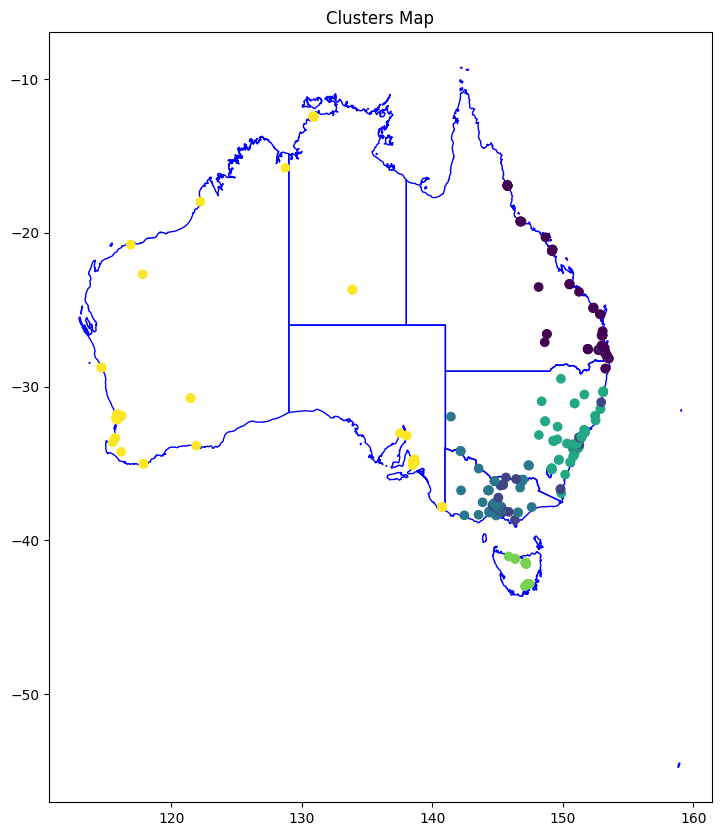

In [256]:
# Tạo subplot
fig, ax = plt.subplots(figsize=(10, 10))


# Hiển thị dia giới các bang
australian_states.plot(ax=ax, color='none', edgecolor='blue', linewidth=1)

ax.scatter(Customer_Master['Longitude'], Customer_Master['Latitude'], c=Customer_Master['Cluster'])

# Đặt tên cho subplot
ax.set_title('Clusters Map')

# Hiển thị bản đồ
plt.show()

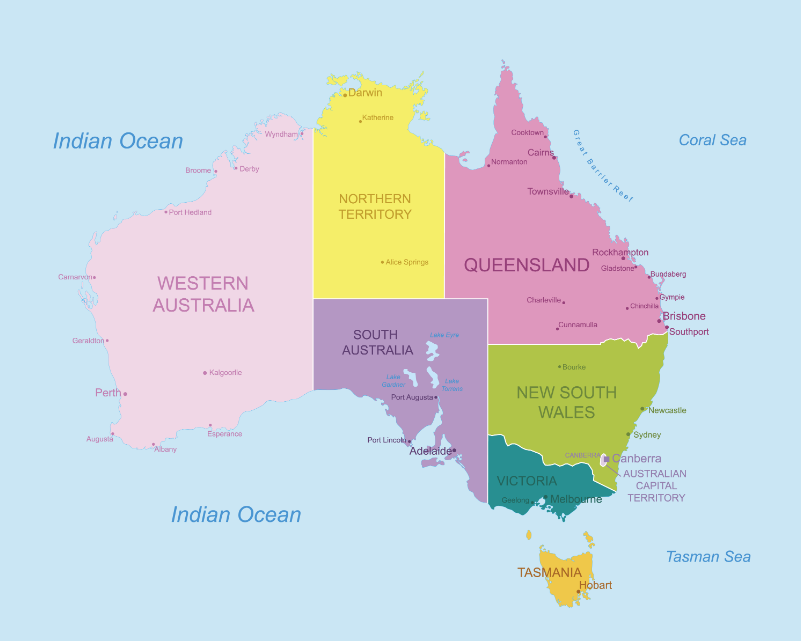

# 3. Calculating requirements

## 1. Related cost

- Transportation cost
- Collection points cost
- Buliding collection points

In [368]:
Customer_Master[Customer_Master["Cluster"]==1].value_counts("Organization")
#Found that all customer in cluster 1 do not have any order in 2022. So we decided to delete this cluster

Organization
20    91
Name: count, dtype: int64

In [347]:
Product_Master['ProductID'] = Product_Master['ProductID'].astype('int64')
Package_Per_Sales_Order = pd.merge(Sales_Order_2022[['GoodsIssueDate','ProductID', "CustomerRef", 'GrossWeightInKg','NetWeightInKg']],
                                   Product_Master[['ProductID', 'KgPerPallet', 'Unit']],on='ProductID',how='inner')
Package_Per_Sales_Order['Pallets']=(Package_Per_Sales_Order['NetWeightInKg']/Package_Per_Sales_Order['KgPerPallet']).astype(float).round(2)

In [354]:
Cluster_Pallets_Weekly = pd.merge(Package_Per_Sales_Order, Customer_Master[['CustomerRef',"Cluster"]])

In [370]:
Cluster_Pallets_Weekly

,GoodsIssueDate,ProductID,CustomerRef,GrossWeightInKg,NetWeightInKg,KgPerPallet,Unit,Pallets,Cluster
0,2022-12-31,3110656,11002626,9774.3360,9529.3440,992.64,GBOT,9.60,2
1,2023-01-01,3110656,11002626,8552.5440,8338.1760,992.64,GBOT,8.40,2
2,2022-12-30,3110656,11002626,4887.1680,4764.6720,992.64,GBOT,4.80,2
3,2022-12-29,3110656,11002626,8552.5440,8338.1760,992.64,GBOT,8.40,2
4,2022-12-28,3110656,11002626,12217.9200,11911.6800,992.64,GBOT,12.00,2
...,...,...,...,...,...,...,...,...,...
13343,2022-02-18,116052,11001747,229.2120,218.5920,910.8,CTN,0.24,0
13344,2022-01-28,116052,11001747,458.4240,437.1840,910.8,CTN,0.48,0
13345,2022-01-24,116052,11001747,229.2120,218.5920,910.8,CTN,0.24,0
13346,2022-01-14,116052,11001747,229.2120,218.5920,910.8,CTN,0.24,0


In [336]:
Cluster_Pallets_Weekly['GoodsIssueDate'] = pd.to_datetime(Cluster_Pallets_Weekly['GoodsIssueDate'])

# Set the 'GoodsIssueDate' column as the index
Cluster_Pallets_Weekly.set_index('GoodsIssueDate', inplace=True)

# Group the data by week and customer, and calculate the sum of pallets
weekly_pallets = Cluster_Pallets_Weekly.groupby([pd.Grouper(freq='W'), 'Cluster'])['Pallets'].sum()

# Reset the index to make it a DataFrame
weekly_pallets = weekly_pallets.reset_index()

In [337]:
Tasmania = weekly_pallets[weekly_pallets['Cluster']==4]

In [338]:
Tasmania["Pallets"].mean()
# Tasmania has three big Plants
# So Tasmania cluster do not need to build a collection point. Bring all return package to Plants

3.5333962264150944

In [339]:
Cluster5 = weekly_pallets[weekly_pallets['Cluster']==5]
Cluster5_OverFlow = Cluster5[Cluster5['Pallets']>70]
print(Cluster5["Pallets"].sum())
sum(Cluster5_OverFlow["Pallets"]-70)

2730.24


174.96999999999997

1 small collection point for this cluster 5   
Overflow cost 3 * 175 = 525$   
Energy Consumption:   
2730 * 2.4 = 6552.0 kWh   
Co2 emission:  
6552.0 * 0.371 = 2430.792 kg  


2487.59


136.64

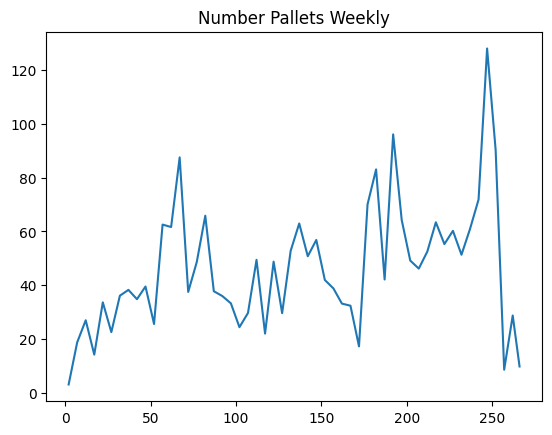

In [340]:
Cluster3 = weekly_pallets[weekly_pallets['Cluster']==3]
Cluster3_OverFlow = Cluster3[Cluster3['Pallets']>70]
Cluster3["Pallets"].plot(title = 'Number Pallets Weekly')

print(Cluster3["Pallets"].sum())
sum(Cluster3_OverFlow["Pallets"]-70)

1 small collection point for this cluster 5
Overflow cost 3 * 175 = 525$
Energy Consumption:
2730 * 2.4 = 6552.0 kWh
Co2 emission:
6552.0 * 0.371 = 2430.792 kg

14392.939999999999

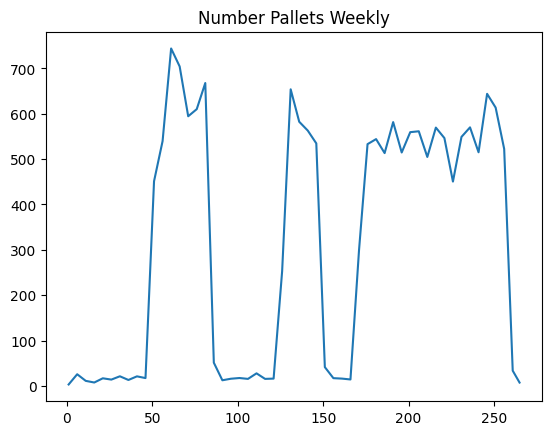

In [341]:
Cluster2 = weekly_pallets[weekly_pallets['Cluster']==2]
Cluster2_OverFlow = Cluster2[Cluster2['Pallets']>70]
Cluster2["Pallets"].plot(title = 'Number Pallets Weekly')
sum(Cluster2_OverFlow["Pallets"]-70)

209.64

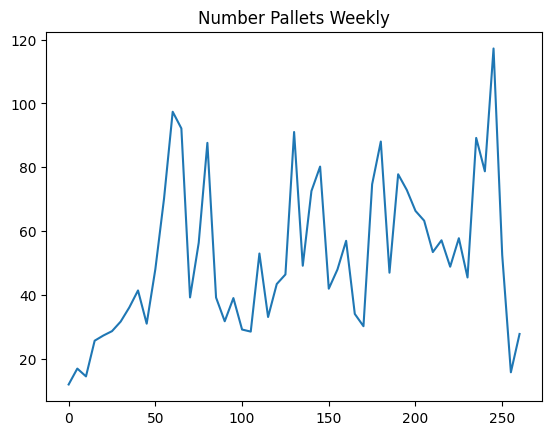

In [369]:
Cluster0 = weekly_pallets[weekly_pallets['Cluster']==0]
Cluster0_OverFlow = Cluster0[Cluster0['Pallets']>70]
Cluster0["Pallets"].plot(title = 'Number Pallets Weekly')
sum(Cluster0_OverFlow["Pallets"]-70)

In [375]:
Order_weekly_No_GBOT = Cluster_Pallets_Weekly.drop(Cluster_Pallets_Weekly[Cluster_Pallets_Weekly["Unit"]=="GBOT"].index, axis=0)

Order_weekly_No_GBOT['GoodsIssueDate'] = pd.to_datetime(Order_weekly_No_GBOT['GoodsIssueDate'])

# Set the 'GoodsIssueDate' column as the index
Order_weekly_No_GBOT.set_index('GoodsIssueDate', inplace=True)

# Group the data by week and customer, and calculate the sum of pallets
weekly_pallets_noGBOT = Order_weekly_No_GBOT.groupby([pd.Grouper(freq='W'), 'Cluster'])['Pallets'].sum()

# Reset the index to make it a DataFrame
weekly_pallets_noGBOT = weekly_pallets_noGBOT.reset_index()

In [376]:
Cluster5 = weekly_pallets_noGBOT[weekly_pallets_noGBOT['Cluster']==5]
Cluster5_OverFlow = Cluster5[Cluster5['Pallets']>70]
print(Cluster5["Pallets"].sum())
sum(Cluster5_OverFlow["Pallets"]-70)

2730.24


174.96999999999997

2487.59


136.64

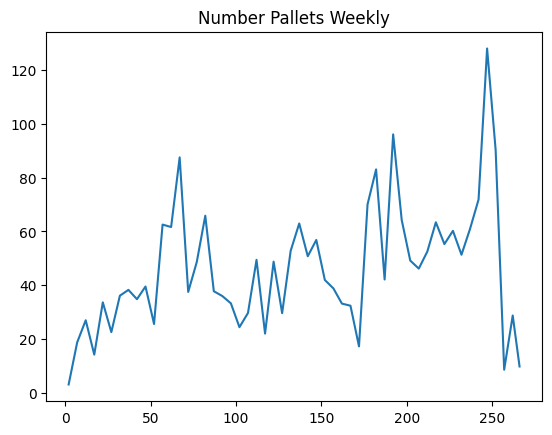

In [377]:
Cluster3 = weekly_pallets_noGBOT[weekly_pallets_noGBOT['Cluster']==3]
Cluster3_OverFlow = Cluster3[Cluster3['Pallets']>70]
Cluster3["Pallets"].plot(title = 'Number Pallets Weekly')

print(Cluster3["Pallets"].sum())
sum(Cluster3_OverFlow["Pallets"]-70)

0

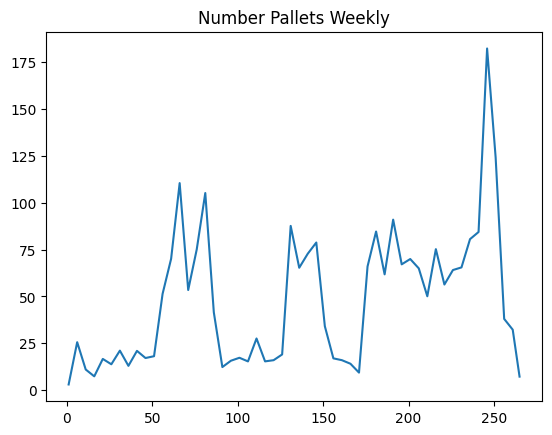

In [381]:
Cluster2 = weekly_pallets_noGBOT[weekly_pallets_noGBOT['Cluster']==2]
Cluster2_OverFlow = Cluster2[Cluster2['Pallets']>230]
Cluster2["Pallets"].plot(title = 'Number Pallets Weekly')
sum(Cluster2_OverFlow["Pallets"]-230)